In [8]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)
mnist

{'data':        pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  pixel9  \
 0           0       0       0       0       0       0       0       0       0   
 1           0       0       0       0       0       0       0       0       0   
 2           0       0       0       0       0       0       0       0       0   
 3           0       0       0       0       0       0       0       0       0   
 4           0       0       0       0       0       0       0       0       0   
 ...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
 69995       0       0       0       0       0       0       0       0       0   
 69996       0       0       0       0       0       0       0       0       0   
 69997       0       0       0       0       0       0       0       0       0   
 69998       0       0       0       0       0       0       0       0       0   
 69999       0       0       0       0       0       0       0       0       0   
 
      

In [9]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [10]:
X , y = mnist['data'] , mnist['target']
X.shape

(70000, 784)

'7'

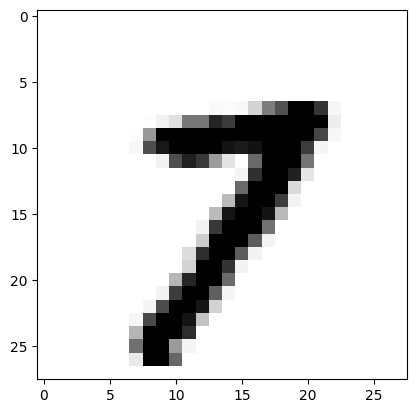

In [11]:
import matplotlib.pyplot as plt 

random_digit = X.iloc[40000]
random_digit.shape
type(random_digit)
plt.imshow(random_digit.values.reshape(28,28) , cmap='binary')
y[40000]

In [12]:
# Train test split mnist datasets is already created as test and train set first 60000 train and rest 10000 test 

X_train , X_test ,  y_train , y_test = X.iloc[:60000] , X.iloc[60000 : ]  , y.iloc[:60000] , y.iloc[60000:]

In [13]:
X_train.shape

(60000, 784)

In [14]:
# SHuffle the training set to guarentte equality of result 
import numpy as np 
shuffle_index = np.random.permutation(X_train.shape[0])
X_train , y_train = X_train.iloc[shuffle_index].reset_index(drop = True) , y_train.iloc[shuffle_index].reset_index(drop = True)

'8'

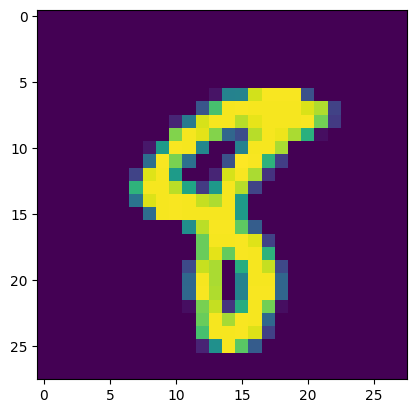

In [15]:
plt.imshow(X_train.iloc[50000].values.reshape(28,28))
y_train.iloc[50000]

In [16]:
y_train.value_counts()

class
1    6742
7    6265
3    6131
2    5958
9    5949
0    5923
6    5918
8    5851
4    5842
5    5421
Name: count, dtype: int64

## Training a Binary Classifier

In [17]:
y_train_5 = (y_train == '5').astype('int64')
y_test_5 = (y_test == '5').astype('int64')
y_test_5.value_counts()

class
0    9108
1     892
Name: count, dtype: int64

In [18]:
y_train_5.value_counts()

class
0    54579
1     5421
Name: count, dtype: int64

In [19]:
# training a SDG classifier 
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train , y_train_5)


SGDClassifier(random_state=42)

In [20]:
y_pred_5 = sgd_clf.predict(X_test)
y_pred_5


array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

## Classification Metrics

In [21]:
# implementing cross-validation 
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone 

skfolds = StratifiedKFold(n_splits = 3)

for train_index , test_index in skfolds.split(X_train , y_train_5):
    clone_clf = clone(sgd_clf)
    X_train_folds  = X_train.iloc[train_index]
    y_train_folds = y_train_5.iloc[train_index]
    X_test_fold = X_train.iloc[test_index]
    y_test_fold = y_train_5.iloc[test_index]

    clone_clf.fit(X_train_folds , y_train_folds)
    y_predict = clone_clf.predict(X_test_fold)
    
    n_Correct = sum(y_predict == y_test_fold)
    print(n_Correct/len(y_test_fold))


0.96785
0.97115
0.96395


In [22]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf , X_train , y_train_5 , cv = 3 , scoring='accuracy')

array([0.96785, 0.97115, 0.96395])

In [23]:
from sklearn.base import BaseEstimator

class Never_5_classifier(BaseEstimator) : 
    def fit(self  , X , y) : 
        pass
    def predict(self , X):
        return np.zeros(X.shape[0])
never_5_clf = Never_5_classifier()
cross_val_score(never_5_clf , X_train, y_train_5 , cv = 3 , scoring='accuracy')

array([0.91215, 0.9042 , 0.9126 ])

## Confusion Matrix

In [24]:
#cross_val_predict Just like the cross_val_score() function, cross_val_predict() performs K-fold
# cross-validation, but instead of returning the evaluation scores, it returns the predic‐
# tions made on each test fold. This means that you get a clean prediction for each
# instance in the training set (“clean” meaning that the prediction is made by a model
# that never saw the data during training)

from sklearn.model_selection import cross_val_predict
y_train_predict = cross_val_predict(sgd_clf , X_train , y_train_5 , cv =3)
y_train_predict

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [25]:
y_train_predict.shape

(60000,)

In [26]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_5 , y_train_predict )

array([[53977,   602],
       [ 1339,  4082]], dtype=int64)

In [27]:
# perfect confusion_matrix only has non zero on its  main diagonal rest zero 
confusion_matrix(y_train_5 , y_train_5)

array([[54579,     0],
       [    0,  5421]], dtype=int64)

In [28]:
from sklearn.metrics import precision_score , recall_score
precision_score(y_train_5 , y_train_predict)

0.8714773697694278

In [29]:
recall_score(y_train_5 , y_train_predict)

0.7529976019184652

In [30]:
from sklearn.metrics import f1_score
f1_score(y_train_5 , y_train_predict)

0.8079168728352301

## Decision Threshold and precision/recall tradeoff

'5'

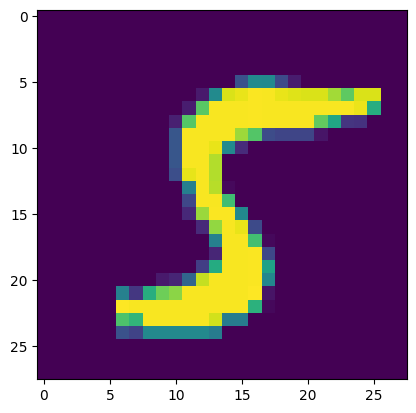

In [51]:
# scikit-learn doesn't let you set the threshold directly but it does give you access to the decision score that it used to make prediction. Instead of calling the classifier's predict() method, you can call its decision_function() method, which return a score for each instance, and the make prediction based on those score using any threhold you want 

some_digit = X_train.iloc[59969]
plt.imshow(some_digit.values.reshape(28,28))
y_train.iloc[59969]

In [52]:
y_scores = sgd_clf.decision_function([some_digit])
y_scores

c:\Users\Sachin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


array([6757.2654217])

In [53]:
y_train[y_train == '5']

15       5
17       5
38       5
48       5
57       5
        ..
59952    5
59960    5
59967    5
59969    5
59986    5
Name: class, Length: 5421, dtype: category
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']

In [54]:
# sgd classifier uses threshold as 0 so scores above 0 are conssidiered positive and below are considered negative
threshold =  0 
print(y_scores > threshold)

# ser the threshold to 40000
threshold = 40000
print(y_scores > threshold)


#! This confirms that raising the threshold decreases the recall 
#! The image actaully represents 5 , the classifier detects it when the threshold was 0 but couldnot detect it whent the threshold was 40000


[ True]
[False]


## How to choose the correct threshold? 
First get the scores of all instances of training set using the cross_val_predict() function specifiying that you want decision_scores instread of predictions 

Now with these score compute the precision and recall for all possible threshold using the precision_recall_curve() function : 

In [55]:
y_scores = cross_val_predict(sgd_clf , X_train , y_train_5 , cv =3 , method = 'decision_function')
y_scores

array([-27254.18245379, -50408.34052279,  -9875.73958424, ...,
       -21598.1522552 , -17396.24705606, -13392.47003414])

In [62]:
from sklearn.metrics import precision_recall_curve
precisions , recalls , thresholds = precision_recall_curve(y_train_5 , y_scores)

precisions

array([0.09035   , 0.09035151, 0.09035301, ..., 1.        , 1.        ,
       1.        ])

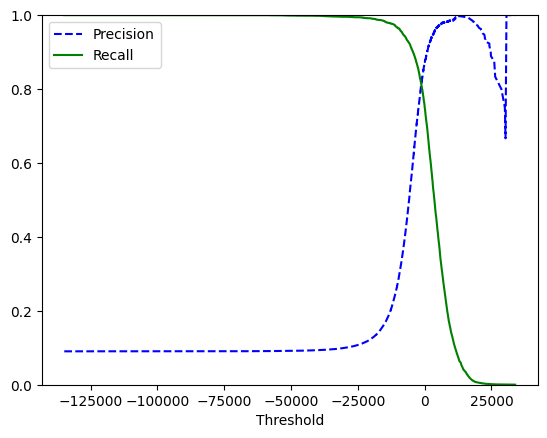

In [65]:
def plot_precision_recall_vs_threshold(precisions , recalls , thresholds) : 
    plt.plot(thresholds , precisions[0:-1] , "b--" , label = "Precision")
    plt.plot(thresholds , recalls[0:-1] , "g-" , label = "Recall")
    plt.xlabel("Threshold")
    plt.legend(loc = "upper left")
    plt.ylim(0,1)

plot_precision_recall_vs_threshold(precisions , recalls , thresholds)
plt.show()

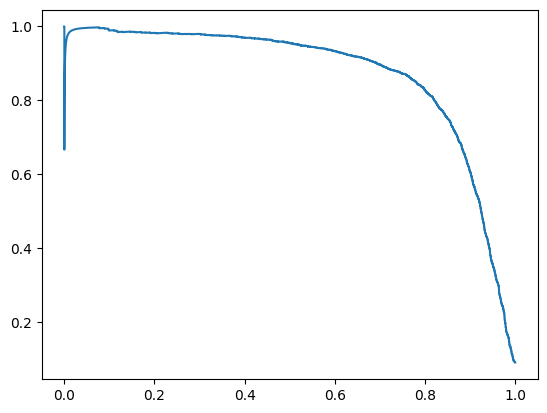

In [66]:
def precision_vs_recall(precisions , recalls) : 
    plt.plot(recalls[:-1] , precisions[:-1])
precision_vs_recall(precisions 	, recalls)

In [69]:
print(precision_score(y_train_5 , y_train_predict))
print(recall_score(y_train_5 	, y_train_predict))


0.8714773697694278
0.7529976019184652


In [ ]:
# Lets try 90% precision by increasing the threshold , recall decreases of course 
y_train_pred_90 = (y_scores > 1000).astype('int64')
print(y_train_pred_90)
print(precision_score(y_train_5 , y_train_pred_90))
print(recall_score(y_train_5 , y_train_pred_90))

[0 0 0 ... 0 0 0]
0.901513331731924
0.6923076923076923


In [83]:
from sklearn.metrics import roc_curve
fpr , tpr , thresholds = roc_curve(y_train_5 , y_scores)

In [84]:
fpr

array([0.        , 0.        , 0.        , ..., 0.99827773, 0.99827773,
       1.        ])

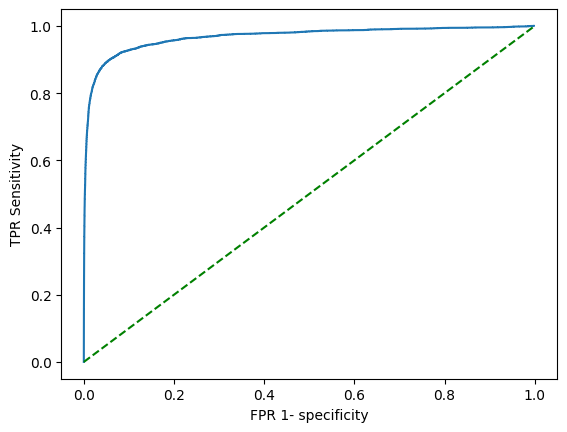

In [97]:
def plot_roc_curve(fpr , tpr , thresholds) : 
    plt.plot( fpr[:-1] , tpr[:-1])
    plt.plot([0,1],[0,1] , 'g--')
    plt.xlabel('FPR 1- specificity')
    plt.ylabel('TPR Sensitivity')

plot_roc_curve(fpr , tpr , thresholds)

In [91]:
# find area under roc curve
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_5 , y_scores)

0.9677191234763183